<a href="https://colab.research.google.com/github/chrischriscris/Generative-Art-in-Python/blob/main/Christopher_G%C3%B3mez_Proyecto_CI2691_Entrega_Final_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="http://ykxyjwk.cluster028.hosting.ovh.net/logotipoUSB.png" width=300></img> 

# CI2691 Project

## A Genetic Algorithm using Python for Generative Art

Copyright (c) 2021 Christopher Gómez

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

Inspired and based on [Chris Cummins' work](https://chriscummins.cc/s/genetics/#) and his JavaScript implementation of this idea.

# Library instalation and importing

+ [Pillow](https://pillow.readthedocs.io/en/stable/index.html): A PIL (Python Image Library) fork. Adds image processing capabilities to the Python interpreter, fundamental for this project.
+ [Requests](https://requests.readthedocs.io/en/master/): HTTP for Humans™. Allows to send HTTP/1.1 requests extremely easily. Used here for downloading images programatically.
+ [Matplotlib](https://matplotlib.org/): A comprehensive library for creating static, animated, and interactive visualizations in Python. Used here to plot convergence of this method.
+ [IPywidgets](https://ipywidgets.readthedocs.io/en/latest/): Adds interactive HTML widgets for Jupyter notebooks and the IPython kernel.

In [ ]:
!pip install Pillow
!pip install requests
!pip install matplotlib
!pip install ipywidgets

^C
^C
^C
^C


In [ ]:
import sys
import os
import requests
from random import random  # times faster than randint() as is written in C
from IPython.display import Image as Img, clear_output
from ipywidgets import interact_manual
import ipywidgets as wg
from PIL import Image, ImageDraw, ImageStat, ImageChops
import matplotlib.pyplot as plt

# Some utils

These are functions that are not part of the genetic algorithm itself, but are extensively needed and used in order to make it work properly and/or to simplify a little bit the things.

In [ ]:
def ri(a: int, b:int) -> int:
    """ Returns a random integer between a and b, both inclusive
    Args:
        a, b: integers, a <= b

    Author: Christopher Gómez
    Date: March 17th, 2021
    """
    return round(random()*(b-a)+a)

def get_img(url: str, name: str) -> None:
    """ Downloads and image from url and saves it with name specified
    Args:
        url: string
        name: filename (string)
        
    Adapted from https://parzibyte.me
    /blog/2018/03/26/descargar-imagen-gif-png-jpg-python/

    Author: Christopher Gómez
    Date: March 17th, 2021
    """
    # If name doesn't include .png extension, include it
    if not name.lower().endswith('.png'):
        name += '.png'

    try:
        img = requests.get(url).content 
        with open(name, 'wb') as fi:
            fi.write(img)
            print(f'Image succesfully downloaded with name {name}')
    except Exception as e:
        print(f'An error ocurred getting the image. ({e})')

def resize_image(path: str, max_size: int, new_name='') -> str:
    """ Resize image in path to max_size maintaining aspect ratio.
    
    Args:
        path: a filename (string)
        max_size: maximum size in pixels (positive integer)
    Returns:
        name of resized image (string)

    Author: Christopher Gómez
    Date: March 17th, 2021
    """
    try:
        # Open the image
        im = Image.open(path)
        width, height = im.size
    except FileNotFoundError:
        print('Failed operation, file does not exists.')
        sys.exit()

    # Resize to a max size
    ratio = width / height  # Saves aspect ratio

    if width > height:
        im = im.resize((max_size, round(max_size/ratio)))
    else:
        im = im.resize((round(max_size*ratio), max_size))

    # If name doesn't include .png extension, include it
    if not new_name:
        new_name = f'{path[:-4]}_resized'
    if not new_name.lower().endswith('.png'):
        new_name += '.png'

    im.save(new_name, 'PNG')
    im.close()
    return new_name   

def display_img(path: str) -> None:
    """ Shows the image in path in an IPython Notebook enviroment
    
    Args:
        path: a filename (string)

    Author: Christopher Gómez
    Date: March 17th, 2021
    """
    display(Img(filename=path))
    
def create_canvas(name: str, size: (int, int), color='black') -> str:
    """ Creates a new image with name and size specified

    Args:
        name: a filename (string)
        size: a tuple of nonnegative integers (width, height)
        color(optional): color of canvas (as an RGB tuple or an string, see
        Pillow documentation on colors) [default set to 'black']
    Returns:
        Name of generated image

    Author: Christopher Gómez
    Date: March 17th, 2021
    """
    # If name doesn't include .png extension, include it
    if not name.lower().endswith('.png'):
        name += '.png'
    
    im = Image.new('RGB', size, color)
    im.save(name, 'PNG')
    return name

Image succesfully downloaded with name colab.png


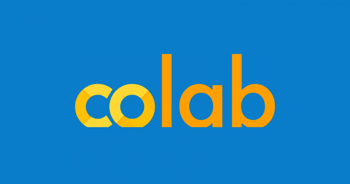

Image succesfully downloaded with name bioletamata.png


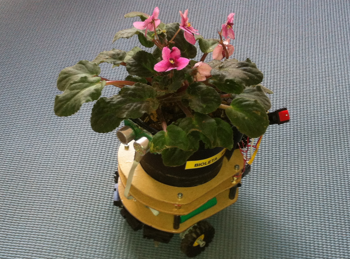

Image succesfully downloaded with name yhlqmdlg.png


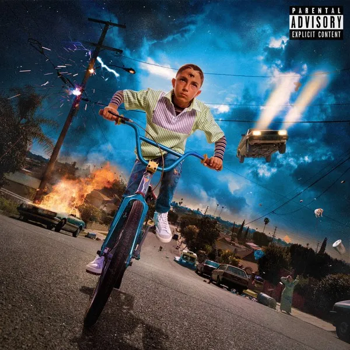

Image succesfully downloaded with name adele.png


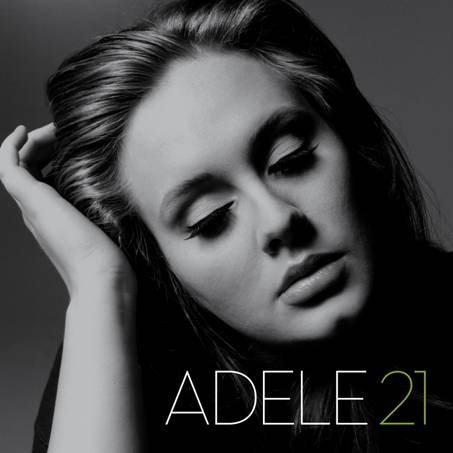

In [ ]:
# --------- TESTS ------------
URL = 'https://miro.medium.com/max/1200/1*MYSepwn_bHkb_CdstXvnRg.png'
colab = 'colab.png'
get_img(URL, colab)
colab = resize_image(colab, 350)
display_img(colab)

URL = 'https://cchangusb.files.wordpress.com/2012/02/bioletamata2012021.jpg'
cchang = 'bioletamata.png'
get_img(URL, cchang)
cchang = resize_image(cchang, 350)
display_img(cchang)

URL = 'https://e.snmc.io/i/600/w/f2a0c36eab6625dbc8cc634f42159656/8019695/badbunny-yhlqmdlg-cover-art.jpg'
bad_bunny = 'yhlqmdlg.png'
get_img(URL, bad_bunny)
bad_bunny = resize_image(bad_bunny, 350)
display_img(bad_bunny)

URL = 'https://lh3.googleusercontent.com/-XCXv0h2b9K8/TY3b8F1NJqI/AAAAAAAAB0o/YPgrwNVqT5Y/s1600/Adele+21.jpg'
adele = 'adele.png'
get_img(URL, adele)
display_img(adele)

# Genetics Random Lab™

Treat it as kind of a namespace to properly work in the realization of the genetic algorithm itself. In a project like this is that you can see how important is the Object Oriented Programming paradigm. It's insanely ugly to work with all this stuff as lists, and lists of lists, and lists of lists of lists of tuples, and so on...

What do we need to make this algorithm make sense? Some generators. As we want to generate an image out of polygons, we will need functions to generate random polygons, lists of polygons, draw these polygons in an actual image, and see how much equal are those generated images to the ones we want to replicate.

We need to define some things which we'll be referencing along the whole project. This can serve as a documentation or as package docstring, maybe. I'm not going to repeat these definitions all the way through so I define some "objects" I'll be referencing here in order to avoid repetition and enhace readability.

## Objects (?)

+ [**Coordinates**](https://pillow.readthedocs.io/en/stable/handbook/concepts.html#coordinate-system): A 2-tuple of integers (x, y) representing either a position on an image or its size. The coordinate system to be used has (0, 0) as upper left corner.
+ **Vertices**: A list of n positions (n>1) \[p1, p2, ..., pn\] representing the vertices of a polygon.
+ [**Color**](https://pillow.readthedocs.io/en/stable/reference/ImageColor.html#color-names): A 4-tuple of integers between 0 and 255 (R, G, B, A), both inclusive, representing the values of the 4 bands of a pixel. It can also have other formats, see PIL documentation.
+ **Polygon**: A list of two elements  \[vertices, color\], with enough information for PIL to draw it onto a PNG file.
+ **Individual genotype**: A list of polygons \[g1, g2, ..., gn\], representing the genotype of an individual, shortened in docstrings as just "Individual".
+ **Population**: A list of elements of the form \[individual, fitness\].

### A note on randomness

As I'm a bit interested in these questions time ago, I wanted to make this project using the [secrets module](https://docs.python.org/3/library/secrets.html), because it generate more ["random"](https://es.wikipedia.org/wiki/N%C3%BAmero_pseudoaleatorio) numbers. I was gonna take them from [random.org](https://www.random.org/), actually, but these aren't free. It could be said that the numbers from secrets module are "more random", but at the end I didn't want to sacrifice efficiency so I decided to go with random() from the [random](https://docs.python.org/3/library/random.html) Python module and make a little ri() function in order to generate integers between a and b, both inclusive. 

Why didn't I use randint()? Because it is slower, and I know it's maybe insignificant, but we'll be requesting a lot of those (I mean, a lot), so I decided to save every bit of efficiency, we'll need it for other things.

In [ ]:
def gen_polygon(n: int, borders: (int, int)) -> list:
    """ Returns a polygon generated randomly
    
    Args:
        n: number of vertices of the polygon
        borders: tuple of integers representing the size of the canvas in which
        the polygon will be drawn
 
    Author: Christopher Gómez
    Date: March 17th, 2021
    """
    x, y = ri(0, borders[0]), ri(0, borders[1])
    min_p = min(borders[0], borders[1])
    vertices = []
    for _ in range(n):
        vertices.append((x + ri(-round(min_p*(1/3)), round(min_p*(1/3))),
                         y + ri(-round(min_p*(1/3)), round(min_p*(1/3)))))
    RGBA = (ri(0, 255), ri(0, 255), ri(0, 255), ri(120, 170))
    return [vertices, RGBA]

def gen_individual(attributes: (int, int), borders: (int, int)) -> list:
    """ Returns a list of polygons generated randomly
 
    Args:
        attributes: tuple of pos integers (n_of_polygons, n_of_vertices)
        borders: tuple of integers representing the size of the canvas in which
        the polygons will be drawn
 
    Author: Christopher Gómez
    Date: 17th March, 2021
    """
    return [gen_polygon(attributes[1], borders) for _ in range(attributes[0])]
 
def draw_individual(individual: list, size: (int, int), name='indiv.png', color='black') -> None:
    """ Generates the graphical representation of an individual specified
    by a list of paramenters, in a canvas of the given size and color
 
    Args:
        individual: an individual
        size: tuple of pos integers
        name (optional): filename (a string) [default set to 'indiv.png']
        color(optional): color of canvas [default set to 'black']
 
    Author: Christopher Gómez
    Date: 17th March, 2021
    """
    
    # If name doesn't include .png extension, include it
    if not name.lower().endswith('.png'):
        name += '.png'
        
    create_canvas(name, size, color)
    with Image.open(name) as im:
        draw = ImageDraw.Draw(im, 'RGBA')

        for poly in individual:
            draw.polygon(*poly)
        im.save(name, 'PNG')

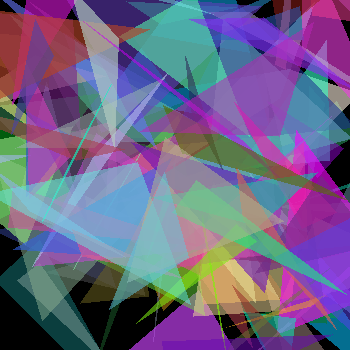

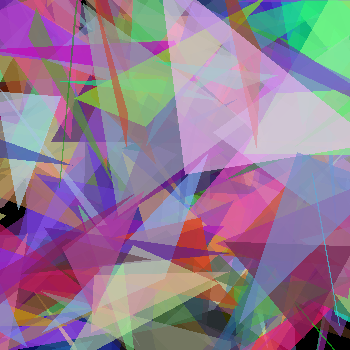

In [ ]:
# --------- TESTS --------------
indiv1 = gen_individual((125, 3), (350, 350))
indiv2 = gen_individual((250, 3), (350, 350))

draw_individual(indiv1, (350, 350), 'indiv1')
draw_individual(indiv2, (350, 350), 'indiv2')

display_img('indiv1.png')
display_img('indiv2.png')

In [ ]:
# Some experimental functions (my eugenics operator)
def get_polygon_fit(path: str, polygon: list) -> (float, list):
    """
    Returns a tuple of:
        - a float between 0 an 100 representing how close is the color
        of given polygon to the actual average color of region delimited by
        its vertices. 0 is totally different, 100 is equal.
        - a list representing an RGB value with the color of the root mean
        square of the specified region.

    Args:
        path: filename (a string)
        polygon: a polygon

    Author: Christopher Gómez
    Date: March 17th, 2021
    """

    with Image.open(path) as im:
         # Creates a mask with the shape of the polygon in polygon[0]
        temp_mask = Image.new('L', im.size)
        mask = ImageDraw.Draw(temp_mask, 'L')
        mask.polygon(polygon[0], 'white')

        # Gets the mean of all pixels inside the given mask
        try:
            stats = ImageStat.Stat(im, temp_mask).rms
            r1, g1, b1 = stats[0], stats[1], stats[2]
        except:
            r1, g1, b1 = 122, 122, 122
        finally:
            r2, g2, b2, a = polygon[1]

        # Computes the sum of cuadratic error between the sums
        # and a
        error = ((r1-r2)**2 + (g1-g2)**2 + (b1-b2)**2) / 3
        error = (error**0.5) / 255
        error *= 100

    return 100 - error, [round(r1), round(g1), round(b1)]

def get_polygon_fit_2(path: str, polygon: list) -> float:
    """
    Returns a float between 0 an 100 representing how close is the color
    of given polygon to the actual average color of region delimited by
    its vertices. 0 is totally different, 100 is equal.

    Args:
        path: filename (a string)
        polygon: a polygon

    Author: Christopher Gómez
    Date: March 17th, 2021
    """
    # Creates a mask with the shape of the polygon in info[0]
    im1 = Image.open(path)
    temp_mask = Image.new('L', im1.size)
    mask = ImageDraw.Draw(temp_mask, 'L')
    mask.polygon(polygon[0], 'white')

    im2 = Image.open(create_canvas('temp.png', im1.size, polygon[1]))

    # Generate diff image in memory.
    diff_img = ImageChops.difference(im1, im2)
    # Calculate difference as a ratio.
    stat = ImageStat.Stat(diff_img, temp_mask)
    diff_ratio = sum(stat.rms) / (len(stat.rms) * 255)
    
    im1.close()
    im2.close()
    
    return 100 - diff_ratio*100

def optimize_individual(individual: list, path: str) -> None:
    """ Recolorize every polygon in an individual in order to optimize
    its fitness, according to the image in path

    Args:
        individual: an individual
        path: filename (a string)

    Author: Christopher Gómez
    Date: March 17th, 2021
    """
    with Image.open(path) as im:
        size = im.size

    for polygon in individual:
        error = get_polygon_fit(path, polygon)
        newr, newg, newb = error[1]
        opacity = polygon[1][3]
        polygon[1] = (newr, newg, newb, opacity)

In [ ]:
# ---------- TESTS ------------
polygon = [[(0, 0), (100, 0),
            (0, 100), (0, 220)],
           (10, 125, 202, 91)]
            
print(get_polygon_fit(colab, polygon))

(99.93183824784927, [10, 125, 202])


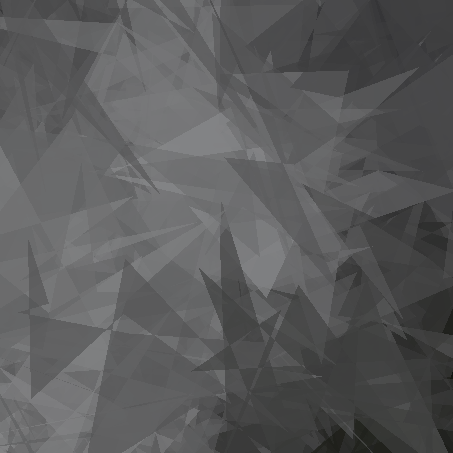

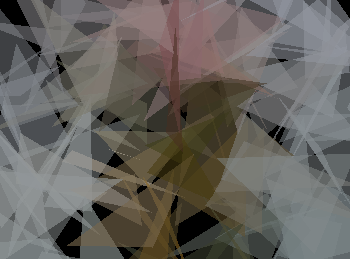

In [ ]:
# ---------- TESTS ------------
size_adele = Image.open(adele).size
indiv1 = gen_individual((350, 10), size_adele)
optimize_individual(indiv1, adele)
draw_individual(indiv1, size_adele)
display_img('indiv.png')

size_chang = Image.open(cchang).size
indiv1 = gen_individual((125, 3), size_chang)
optimize_individual(indiv1, cchang)
draw_individual(indiv1, size_chang)
display_img('indiv.png')

In [ ]:
def calc_fitness(path: str, individual: list) -> float:
    """ Computes the amount of similitude between the fenotype
    of an individual and the image in path. Does it by drawing
    the individual to 'temp_cpm.png' and calculating the difference
    between the two images, comparing channel values at the pixel level.
 
    Args:
        path: filename (a string)
        individual: an individual
 
    Adapted from Nicolas Hahn:
    https://github.com/nicolashahn/diffimg/blob/master/diffimg/__init__.py
    
    Author: Christopher Gómez
    Date: March 17th, 2021
    """
    with Image.open(path) as im1:
        draw_individual(individual, im1.size, 'temp_cmp.png')
        with Image.open('temp_cmp.png') as im2:
            width, height = im1.size
            # Resize to a max 60px max (efficiency treat)
            ratio = width / height  # Saves aspect ratio

            if width > height:
                im1 = im1.resize((60, round(60/ratio)))
                im2 = im2.resize((60, round(60/ratio)))
            else:
                im1 = im1.resize((round(60*ratio), 60))
                im2 = im2.resize((round(60*ratio), 60))
            
            # Generate diff image in memory.
            try:
                diff_img = ImageChops.difference(im1, im2)
            except:
                diff_img = ImageChops.difference(im1.convert('RGB'), im2)
            # Calculate difference as a ratio.
            stat = ImageStat.Stat(diff_img)
            diff_ratio = sum(stat.rms) / (3 * 255)

    return 100 - diff_ratio*100

In [ ]:
# ------------- TESTS ----------------
size_bb = Image.open(bad_bunny).size
indiv1 = gen_individual((350, 3), size_bb)
print(calc_fitness(bad_bunny, indiv1))
optimize_individual(indiv1, bad_bunny)
print(calc_fitness(bad_bunny, indiv1))

67.97122373370712
82.80536292823624


# Genetic Algorithm (Asexual Version)

We are ready to work with our genetic algorithm. Now let's define our operators and make our things work (kinda).

For this first try, I'll define just a mutation operator, as this genetic algorithm will be based on asexual reproduction.

## How does it works?

It works by initializing a random individual and mutating it over generations. If the fitness of a newly generated individual (out of a certain mutation) is better than the previous, it advances towards the next generation.

## Details

I added as much modifyable parameters as I could, but by now I left some others fixed like the amount of variation in a mutation, the probability of mutating and the size of the output image by hardcoding them directly into the functions.

The algorithm works as described, other lines of code are just stylization of the output, plotting and those things.

In [ ]:
def mutate_individual(individual: list, p: int, n:int=10) -> list:
    """ Changes slightly approximately p out of 100 polygons of
    the given individual.

    Args:
        individual: list of polygons
        p: pos int, 1 <= p <= 100
        n: pos integer, representing how much will be added or
        substracted randomly for every triangle choosen to mutate

    Author: Christopher Gómez
    Date: March 20th, 2021
    """
    mutated_ind = []
    n_of_vertices = len(individual[0][0])
    for i, polygon in enumerate(individual):
        # Mutates p/100 polygons
        if ri(1, 100) <= p:
            new_vertices = []
            for j in range(n_of_vertices):
                new_vertices.append((polygon[0][j][0] + ri(-n, n),   # X
                                     polygon[0][j][1] + ri(-n, n)))  # Y
            new_color = ((polygon[1][0] + ri(-n, n)) % 256,   # R
                         (polygon[1][1] + ri(-n, n)) % 256,   # G
                         (polygon[1][2] + ri(-n, n)) % 256,   # B
                         ri(120, 255))                        # A
            mutated_ind.append([new_vertices, new_color])
        else:
            mutated_ind.append(polygon)
    return mutated_ind

In [ ]:
def genetic_algorithm1(goal_image: str, n_of_gens: int, n_of_polygons:int,
                       n_of_vertices:int, goal_fitness: float, show_realtime_plot: bool):
    """ Performs a genetic algorithm based on asexual reproduction

    Args:
        goal_image: filename (a string)
        n_of_gens: (end condition), nonegative integer
        n_of_polygons: pos integer
        n_of_vertices: integer greater than 1
        goal_fitness: (end condition), floating point number
        show_realtime_plot: boolean

    Author: Christopher Gómez
    Date: March 22th, 2021
    """
    # Initialization variables
    goal_imagee = resize_image(goal_image, 100)
    size = Image.open(goal_imagee).size
    individual = gen_individual((n_of_polygons, n_of_vertices), size)
    fitlist = []
    genlist = []
    gen = 0
    
    try:
        while gen < n_of_gens:
            # "Selection"
            individual_fitness = calc_fitness(goal_imagee, individual)

            # For plotting purposes
            fitlist.append(individual_fitness)
            genlist.append(gen)

            # Stop if goal_fitness is reached
            if individual_fitness > goal_fitness:
                break

            # Styling
            clear_output(True)
            print(f'gen: {gen}, fitness: {individual_fitness}')
            draw_individual(individual, size)
            display_img('indiv.png')
            if show_realtime_plot:
                plt.plot(genlist, fitlist, 'r', label='fitness')
                plt.xlabel('generations')
                plt.ylabel('fitness')
                plt.legend(loc='lower right')
                plt.show()

            # Mutation
            new_ind_fit = 0
            while new_ind_fit <= individual_fitness:
                new_ind = mutate_individual(individual, 10)
                new_ind_fit = calc_fitness(goal_imagee, new_ind)
            individual = new_ind
            gen += 1
    except KeyboardInterrupt:
        gen = gen
        
    # Last gen
    clear_output(True)
    print(f'gen: {gen}, fitness: {individual_fitness}')
    draw_individual(individual, size, 'result.png')
    display_img('result.png')
    display_img(goal_imagee)
    
    plt.plot(genlist, fitlist, 'r', label='fitness')
    plt.xlabel('generations')
    plt.ylabel('fitness')
    plt.legend(loc='lower right')
    plt.show()

In [ ]:
# Interactivity controls
g_img = wg.Text(value='adele.png', placeholder='Type something',
                description='Image to replicate: ')
ngens = wg.IntSlider(min=200, max=1200, value=500, step=100,
                    description='Number of generations: ')
npoly = wg.IntSlider(min=1, max=1000, value=125, step = 25,
                     description='Number of polygons: ')
nvertices = wg.IntSlider(min=2, max=5, value=3,
                        description='Number of vertices of each polygon: ')
minfit = wg.FloatSlider(min=65.0, max=98.0, step=0.1, value=87.0,
                     description='Goal fitness required: ')
plotshow = wg.Checkbox(value=False, description='Show realtime plot (bugged)',
                       disabled=False, indent=False)

In [ ]:
print('You can try with these images!: ')

for file in os.listdir():
    fi = file.lower()
    if (fi.endswith('png') or fi.endswith('jpg')
        or fi.endswith('jpeg') or fi.endswith('bmp')):
        print(file)

interact_manual(genetic_algorithm1, goal_image=g_img,
                n_of_gens=ngens, n_of_polygons=npoly,
                n_of_vertices=nvertices, goal_fitness=minfit,
                show_realtime_plot=plotshow)

You can try with these images!: 
yhlqmdlg_resized.png
temp_cmp.png
bioletamata_resized.png
indiv.png
yhlqmdlg.png
colab.png
adele.png
bioletamata.png
indiv2.png
colab_resized.png
indiv1.png


interactive(children=(Text(value='adele.png', description='Image to replicate: ', placeholder='Type something'…

<function __main__.genetic_algorithm1>

# Genetic Algorithm ("Full" version)

I'm actually struggling to make this work. It did work once, but the code didn't save in Colab and I lost 7 hours of code, then I rewrote it as I remember and it didn't work anymore. After having tested almost every selection that comes in my mind, this is which got me more convinced. Although, I left the code of some experimental functions I tested (like that tournament selection one), maybe I will keep developing them later.

## How did it work?

It works by initializing a random population and selecting the best ones of them (elitism) acording to a pressure (a positive integer between 1 and 100), which will define how much of every generation will directly remain to the other.

Then it crosses each individual of that selected group with n random others of the same "elite pool", where n is a number calculated in order to letting the algorithm itself refill the population with the same amount of individual it initially had.

The crossover is performed by selecting a random point between 1/6 and 5/6 times the length of the ADN and interchanging genes between parents from that point.

After every generation, a mutation round is performed to some individual choosen randomly in order to be able to find solutions that couldn't have been considered before just by performing crossovers between individuals.

The algorithm performs these instructions an indicated amount of times, and it's almost guaranteed that the fitness won't decrease over generations, as we're carying the fittest individuals of every generation directly to the next one. The only chance is that by coincidence that individual mutates 
to an slightly worse one, as mutation affects the same to all individuals in the population.

## How does it work?

Forget the last paragraph, that was old me trying all sort of weird things to make this work, now,
it works by initializing a random population and selecting the 10 best ones of them (elitism) to remain in the next generation.

Then, two fathers are choosen according to a 10-participants tournament to make a new son for the next generation. The process is repeated until the offspring is of the required size.

The crossover and mutation is performed the same as before

What makes this algorithm ensure that the fitness don't decease over generations is the tournament selection and the elitism, as we're carrying parts of the best individuals among 20 individuals, so the offspring fitness would be in average greater than before.

## Details

The name of a function remains the same as in the previous cells, just be sure to execute the cells right above the version you want to run to not have problems with the return value

In [ ]:
def gen_population(n_of_individuals: int, attributes: (int, int),
                   borders: (int, int)) -> list:
    """ Returns a population, used to initialize the GA.
    
    Args:
        n_of_individuals: pos integer
        attributes: tuple of pos integers (n_of_polygons, n_of_vertices)
        borders: tuple of pos integers
        
    Author: Christopher Gómez
    Date: March 21st, 2021
    """
    return [[gen_individual(attributes, borders), 0] for _ in range(n_of_individuals)]

def qualificate_and_order(population: list, path: str) -> None:
    """ Calculates the fitness of every individual in population and sorts it
    by fitness in ascending order.
    
    Args:
        population: list of elements of the form [individual, fitness]
        path: filename (a string)
        
    Author: Christopher Gómez
    Date: March 21st, 2021
    """
    # Calculate the fitness of every individual and adds it to the list
    for i, individual in enumerate(population):
        population[i][1] = calc_fitness(path, individual[0])

    # Order population in ascending order by fitness
    population.sort(key=lambda x: x[1])
    
def tournament_select(population: list, n: int) -> list:
    """ Selects n random individuals of the population and makes a tournament
    between them. Returns the fittest.
    
    Args:
        population: a population, previously ordered in ascending order by fitness
        n: pos integer
        
    Author: Christopher Gómez
    Date: March 21st, 2021
    """
    # List of n random individuals
    participants = [ri(0, len(population)-1) for _ in range(n)]
    return population[max(participants)]

def cross_individuals(mother: list, father: list) -> list:
    """ Returns a new individual with a random amount of polygons of the 
    mother and the father.
    
    Args:
        mother, father: individuals
        
    Author: Christopher Gómez
    Date: March 21st, 2021
    """
    # Ensures the interchange of genes is not empty
    m = ri(len(mother)//2 - len(mother)//3, 
          (len(mother)//2 + len(mother)//3))
    if ri(0, 1):
        return mother[:m] + father[m:]
    else:
        return father[:m] + mother[m:]

def mutate_individual(individual: list, p: int, n:int=10) -> list:
    """ Changes slightly approximately p out of 100 polygons of
    the given individual.

    Args:
        individual: list of polygons
        p: pos int, 1 <= p <= 100
        n: pos integer, representing how much will be added or
        substracted randomly for every triangle choosen to mutate

    Author: Christopher Gómez
    Date: March 20th, 2021
    """
    n_of_vertices = len(individual[0][0])
    for i, polygon in enumerate(individual):
        if ri(1, 100) < p:
            new_vertices = []
            for j in range(n_of_vertices):
                new_vertices.append((polygon[0][j][0] + ri(-n, n),   # X
                                     polygon[0][j][1] + ri(-n, n)))  # Y
            new_color = ((polygon[1][0] + ri(-n, n)) % 256,   # R
                         (polygon[1][1] + ri(-n, n)) % 256,   # G
                         (polygon[1][2] + ri(-n, n)) % 256,   # B
                         ri(120, 255))                        # A

            individual[i] = [new_vertices, new_color]

def ranking_sel(population):
    """ Unused, kinda doesn't work, take it as it never existed
    """
    n = len(population)
    m = ri(0, (n*n - n) // 2)

    i = 0
    while (i*i + i) // 2 < m:
        i += 1
    
    return population[i]   

def selection_and_crossover(population: list, path: str, f: object, *args) -> list:
    """ Performs selection and crossover given f as selection function

    Args:
        population: a population, previously ordered in ascending order by fitness
        f: selection function which accepts a population as first parameter
        *args: aditional arguments required for f, if any

    Author: Christopher Gómez
    Date: March 22th, 2021
    """


    offspring = list(reversed(population[-10:]))
    while len(offspring) != len(population):
        mother = f(population, *args)
        father = f(population, *args)

        offspring.append([cross_individuals(mother[0], father[0]), 0])

    return offspring

def perform_mutation(population: list, p: int, var_amount: int=10) -> None:
    """ Mutates one over p individuals of the given population. Changes
    approximately var_amount over 100 triangles of every individual choosen
    to mutate

    Args:
        population: a population
        p: pos integer
        var_amount: integer between 1 and 100, both inclusive

    Author: Christopher Gómez
    Date: March 22th, 2021
    """
    for i in range(0, len(population)):
        # Mutates one over p individuals
        if not ri(0, p-1):
            mutate_individual(population[i][0], var_amount)
            
def population_mean(population):
    """ Returns the mean fitness of the given population

    Args:
        population: a population

    Author: Christopher Gómez
    Date: April 2nd, 2021
    """
    suma = sum(population[i][1] for i in range(len(population)))
    return suma/len(population)

In [ ]:
def genetic_algorithm2(goal_image: str, n_of_gens: int, n_of_individuals: int,
                       goal_fitness: int, n_of_polygons: int,
                       n_of_vertices: int, show_realtime_plot: bool) -> None:
    """ Performs a genetic algorithm based on sexual reproduction and elitism
    selection

    Args:
        goal_image: filename (a string)
        n_of_gens: (end condition), nonegative integer
        n_of_individuals: positive integer
        goal_fitness: (end condition), floating point number
        n_of_polygons: pos integer
        n_of_vertices: integer greater than 1
        show_realtime_plot: boolean

    Author: Christopher Gómez
    Date: March 22th, 2021
    """
    # Initialization variables
    goal_imagee = resize_image(goal_image, 100)
    size = Image.open(goal_image).size
    population = gen_population(n_of_individuals,
                                (n_of_polygons, n_of_vertices), size)
    gen = 0
    fitlist = []
    meanlist = []
    genlist = []
    fittest = [[], 0]
    
    try:
        # Iterate over n_of_gens generations
        while gen < n_of_gens and fittest[1] < goal_fitness:

            # Calculate the fitness of every individual and updates the list
            qualificate_and_order(population, goal_imagee)
            fittest = population[-1]

            # For plotting purposes
            fitlist.append(fittest[1])
            genlist.append(gen)
            meanlist.append(population_mean(population))

            # Styling
            clear_output(True)
            print(f'gen: {gen}, fitness: {fittest[1]}')
            draw_individual(fittest[0], size)
            display_img('indiv.png')
            if show_realtime_plot:
                plt.plot(genlist, fitlist, 'red', label='highest fitness')
                plt.plot(genlist, meanlist, 'blue', label='mean fitness')
                plt.xlabel('generations')
                plt.ylabel('top fitness')
                plt.legend(loc='lower right')
                plt.show()

            # Selection and crossover, 30% of pressure
            population = selection_and_crossover(population, goal_imagee, tournament_select, 10)
            # Mutation: one over 30 individuals will mutate
            perform_mutation(population, 30)

            gen += 1
    except KeyboardInterrupt:
        gen = gen

     # Last gen
    qualificate_and_order(population, goal_imagee)
    fittest = population[-1]
    
    fitlist.append(fittest[1])
    genlist.append(gen)
    meanlist.append(population_mean(population))

    # Styling
    clear_output(True)
    print(f'gen: {gen}, fitness: {fittest[1]}')
    draw_individual(fittest[0], size)
    display_img('indiv.png')
    display_img(goal_imagee)
    
    plt.plot(genlist, fitlist, 'red', label='highest fitness')
    plt.plot(genlist, meanlist, 'blue', label='mean fitness')
    plt.xlabel('generations')
    plt.ylabel('fitness')
    plt.legend(loc='lower right')
    plt.show()

In [ ]:
# Interactivity controls
g_img = wg.Text(value='colab.png', placeholder='Type something',
                description='Image to replicate: ')
ngens = wg.IntSlider(min=200, max=5000, value=1000, step=200,
                    description='Number of generations: ')
npoly = wg.IntSlider(min=50, max=1000, value=125, step=25,
                     description='Number of polygons: ')
nvertices = wg.IntSlider(min=2, max=5, value=3,
                        description='Number of vertices of each polygon: ')
minfit = wg.FloatSlider(min=65.0, max=98.0, step=0.1, value=89.0,
                     description='Goal fitness required: ')
plotshow = wg.Checkbox(value=False, description='Show realtime plot (bugged)',
                       disabled=False, indent=False)
nind = wg.IntSlider(min=20, max=200, value=50, step = 10,
                    description='Number of individuals: ')

In [ ]:
print('You can try with these images!: ')

for file in os.listdir():
    fi = file.lower()
    if (fi.endswith('png') or fi.endswith('jpg')
        or fi.endswith('jpeg') or fi.endswith('bmp')):
        print(file)

interact_manual(genetic_algorithm2, goal_image=g_img,
                n_of_gens=ngens, n_of_individuals=nind,
                goal_fitness=minfit, n_of_polygons=npoly,
                n_of_vertices=nvertices, show_realtime_plot=plotshow)

You can try with these images!: 
yhlqmdlg_resized.png
temp_cmp.png
bioletamata_resized.png
result.png
indiv.png
adele_resized.png
yhlqmdlg.png
colab.png
adele.png
bioletamata.png
indiv2.png
colab_resized.png
indiv1.png


interactive(children=(Text(value='bioletamata.png', description='Image to replicate: ', placeholder='Type some…

<function __main__.genetic_algorithm2>

# Museum

Some screenshots of the results of the execution of my algorithm with every possible combination of parameters

## Monalisa

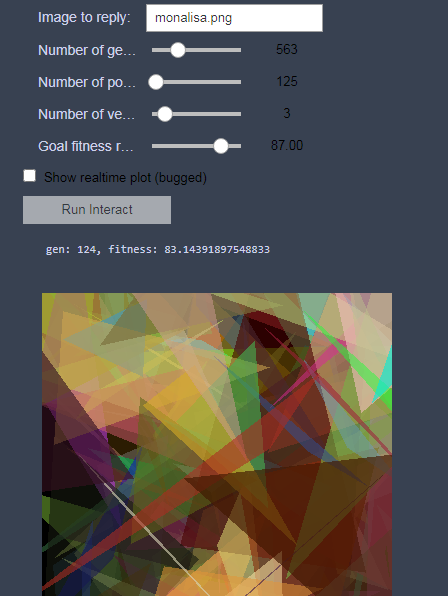

## Bioleta Mata, Asexual version

One of my first really pretty results from this algorithm.

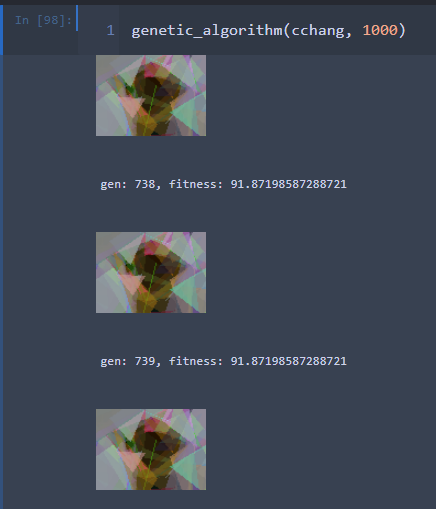

## That Mario png

This one lasted a lot, like 4 hours or so (I don't remember actually). It ran with almost max settings: 5000 generations of 200 individuals with 100 triangles. The higher the number of individual the exponentially slow the algorithm works.

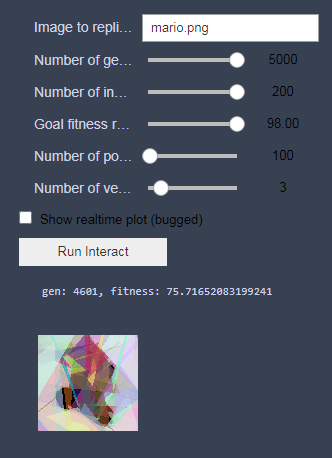

## Bioleta Max specs

200 individuals again. I stopped that at 600 generations but that seems pretty refined to me. 

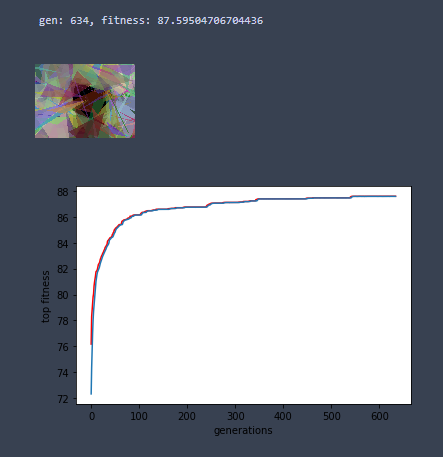´

## Cromovegetal

Yes, imagine that's an actual photo of the Cromovegetal I took. The blueish-white sky at the top and the grass at the bottom. Pretty weird on this is that this was 350 generations, and the screnshoot below is +3000 generations on and it seems almost identical. 

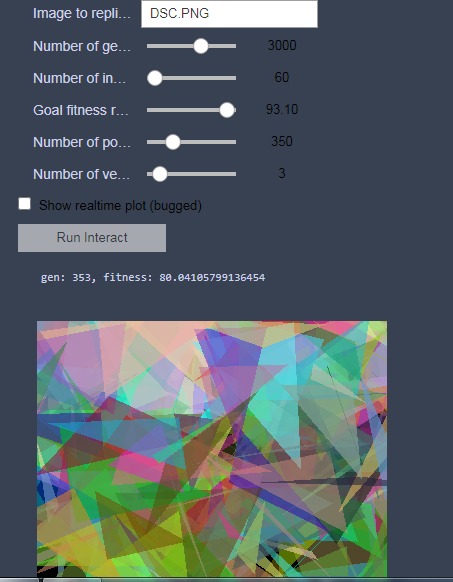

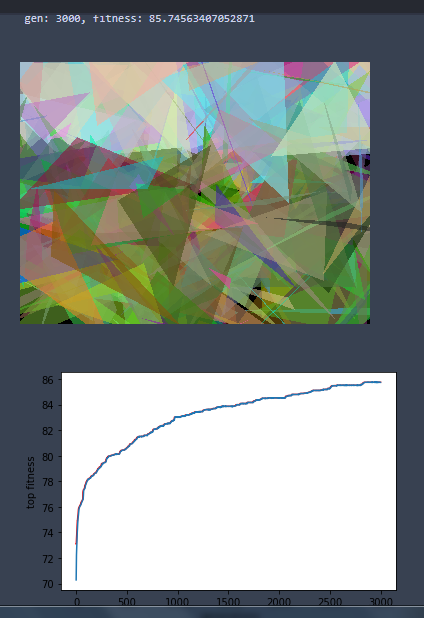

## That Google Colab png

This one is the counterpart of max specs. Pretty small image, 50 individuals, 50 triangles. It ran very fast.

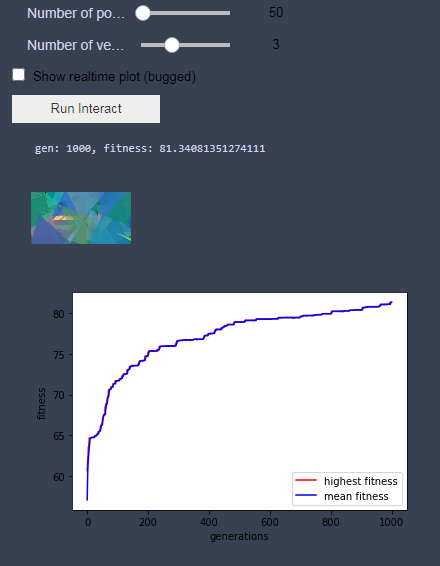

and this one with highest graphics

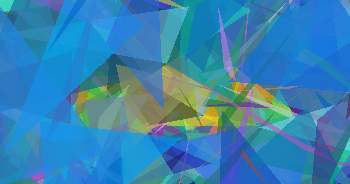

## Guess

I'm not gonna tell what this is but I want to show it

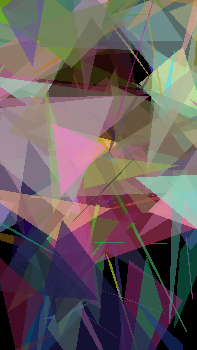

## Ranking selection

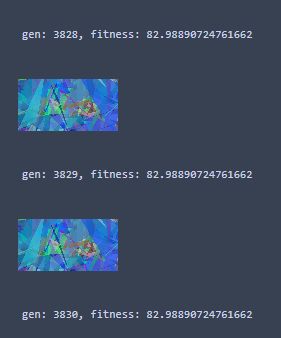

This one below is supposed to be Monalisa...

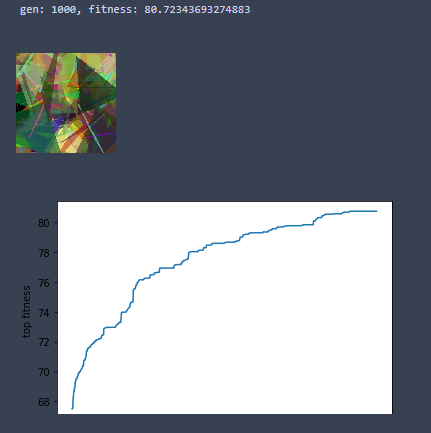

And if you wanted to see how it looks a gen-0

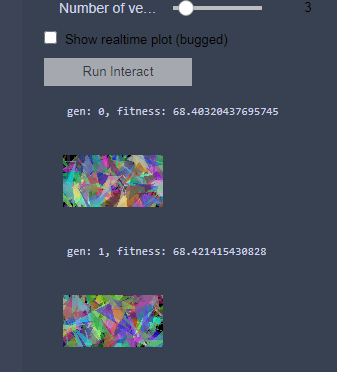

## Finally, Adele

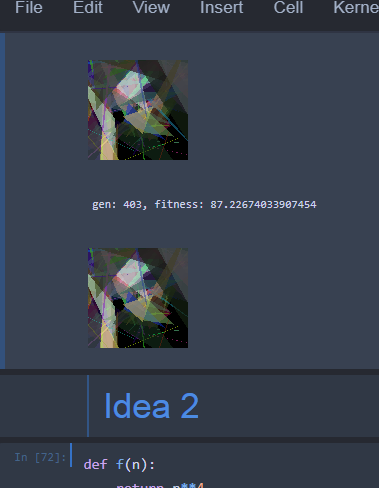